# Libs / Settings

#### Libs

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random

# Import make_classification, eigh, PCA, StandardScaler from sklearn
from sklearn.datasets import make_classification
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import additional libraries for visualization and analysis
from sklearn import datasets, metrics
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, locally_linear_embedding
from umap import UMAP
from IPython.display import IFrame
from scipy.special import kl_div
from scipy.stats import norm

#### Settings

In [2]:
# Set random state of notebook
random_state_notebook = 421

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Question 1

Image file in submission. Called "hw01_q1.pdf"

In [3]:
IFrame("hw01_q1.pdf", width=800, height=1080)

# Question 2

In [4]:
# Get generated data
X_2, _ = make_classification(n_samples=1000, n_features=20, random_state=random_state_notebook)
df_2 = pd.DataFrame(X_2, columns=['feature_'+str(i) for i in range(1,21)])

# Standardize the data
scaler_2 = StandardScaler()
df_std_2 = scaler_2.fit_transform(df_2)
df_std_2 = pd.DataFrame(df_std_2, columns=df_2.columns)

In [5]:
# Calculate COV of df
covariance_2 = df_std_2.cov()

In [6]:
# Calculate Eigenvalues and Eigenvectors
values, vectors = eig(covariance_2)

In [7]:
# Transform data using eigenvectors
largest_eigenvector = vectors[:, 0]
df_transformed_2 = np.matmul(np.array(df_std_2), largest_eigenvector)
custom_pca_2 = pd.DataFrame(data = df_transformed_2, columns = ['PC 1'])

In [8]:
# Get principal component 1 using sklearn
n_components_2 = 20
pca_2 = PCA(n_components = n_components_2)
pca_fit_2 = pca_2.fit_transform(df_std_2)
df_pca_2 = pd.DataFrame(data = pca_fit_2, columns = ['PC '+ str(i+1) for i in range(n_components_2)])

Comparing our method to PCA

In [9]:
# custom_pca
custom_pca_2['PC 1'].head(4)

0    0.225906
1   -0.408838
2   -0.166738
3    2.482287
Name: PC 1, dtype: float64

In [10]:
# sklearn's PCA
df_pca_2['PC 1'].head(4)

0   -0.225906
1    0.408838
2    0.166738
3   -2.482287
Name: PC 1, dtype: float64

As we can see above, our method produces something very similar to PCA. We are only off by a few decimal points. The vector that PCA produces is also -1 times our vector.

In [11]:
print(f"Num PCs explaining above 4% of the variation: {sum(pca_2.explained_variance_ratio_ > 0.04)} \n")
print(pca_2.explained_variance_ratio_)

Num PCs explaining above 4% of the variation: 18 

[1.45333639e-01 6.46958119e-02 6.01884007e-02 5.77379178e-02
 5.60726304e-02 5.47729903e-02 5.33463742e-02 5.16572824e-02
 4.99262776e-02 4.84876928e-02 4.82370123e-02 4.77177820e-02
 4.56132773e-02 4.52937193e-02 4.41340805e-02 4.32776946e-02
 4.26339064e-02 4.08735106e-02 2.13786260e-33 1.36803144e-33]


18 vectors are explaining at least 4% of the variation each. When we look at the 19th and 20th vectors, we can see they each explain 0% of the variance in the data. Therefore, we should select the first 18 principal components.

# Question 3

In [12]:
# Import data
df_3 = pd.read_csv('wdbc.data', header = None)
df_3.columns = [i for i in range(1, 33)]
df_3 = df_3.rename(columns={1: 'id', 2: 'diagnosis', 3: 'radius_mean', 4: 'texture_mean', 
                            5: 'perimeter_mean', 6: 'area_mean', 7: 'smoothness_mean', 
                            8: 'compactness_mean', 9: 'concavity_mean', 10: 'concave_points_mean', 
                            11: 'symmetry_mean', 12: 'fractal_dimension_mean', 13: 'radius_se', 
                            14: 'texture_se', 15: 'perimeter_se', 16: 'area_se', 
                            17: 'smoothness_se', 18: 'compactness_se', 19: 'concavity_se', 
                            20: 'concave_points_se', 21: 'symmetry_se', 22: 'fractal_dimension_se', 
                            23: 'radius_worst', 24: 'texture_worst', 25: 'perimeter_worst', 
                            26: 'area_worst', 27: 'smoothness_worst', 28: 'compactness_worst', 
                            29: 'concavity_worst', 30: 'concave_points_worst', 31: 'symmetry_worst', 
                            32: 'fractal_dimension_worst'})
df_3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### EDA

In [13]:
# Statistical summary
df_3.iloc[:, 1:].describe()[1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


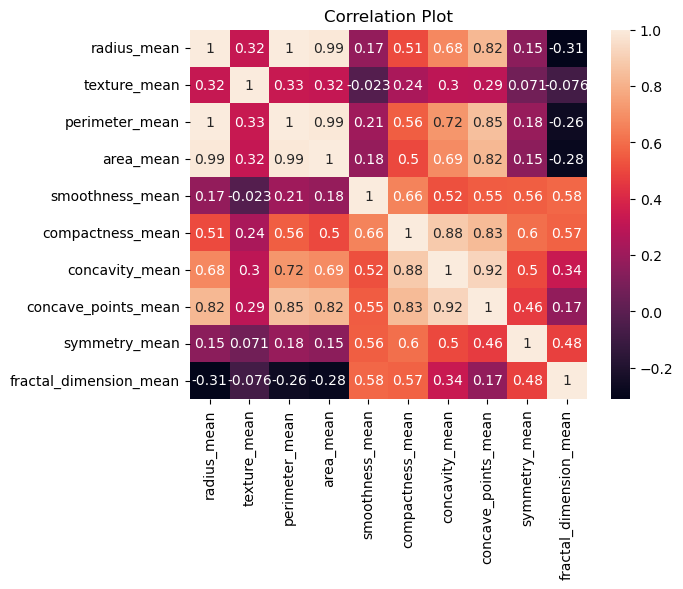

In [14]:
# create the correlation plot
corr = df_3.iloc[:, 2:12].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title("Correlation Plot")
plt.show()

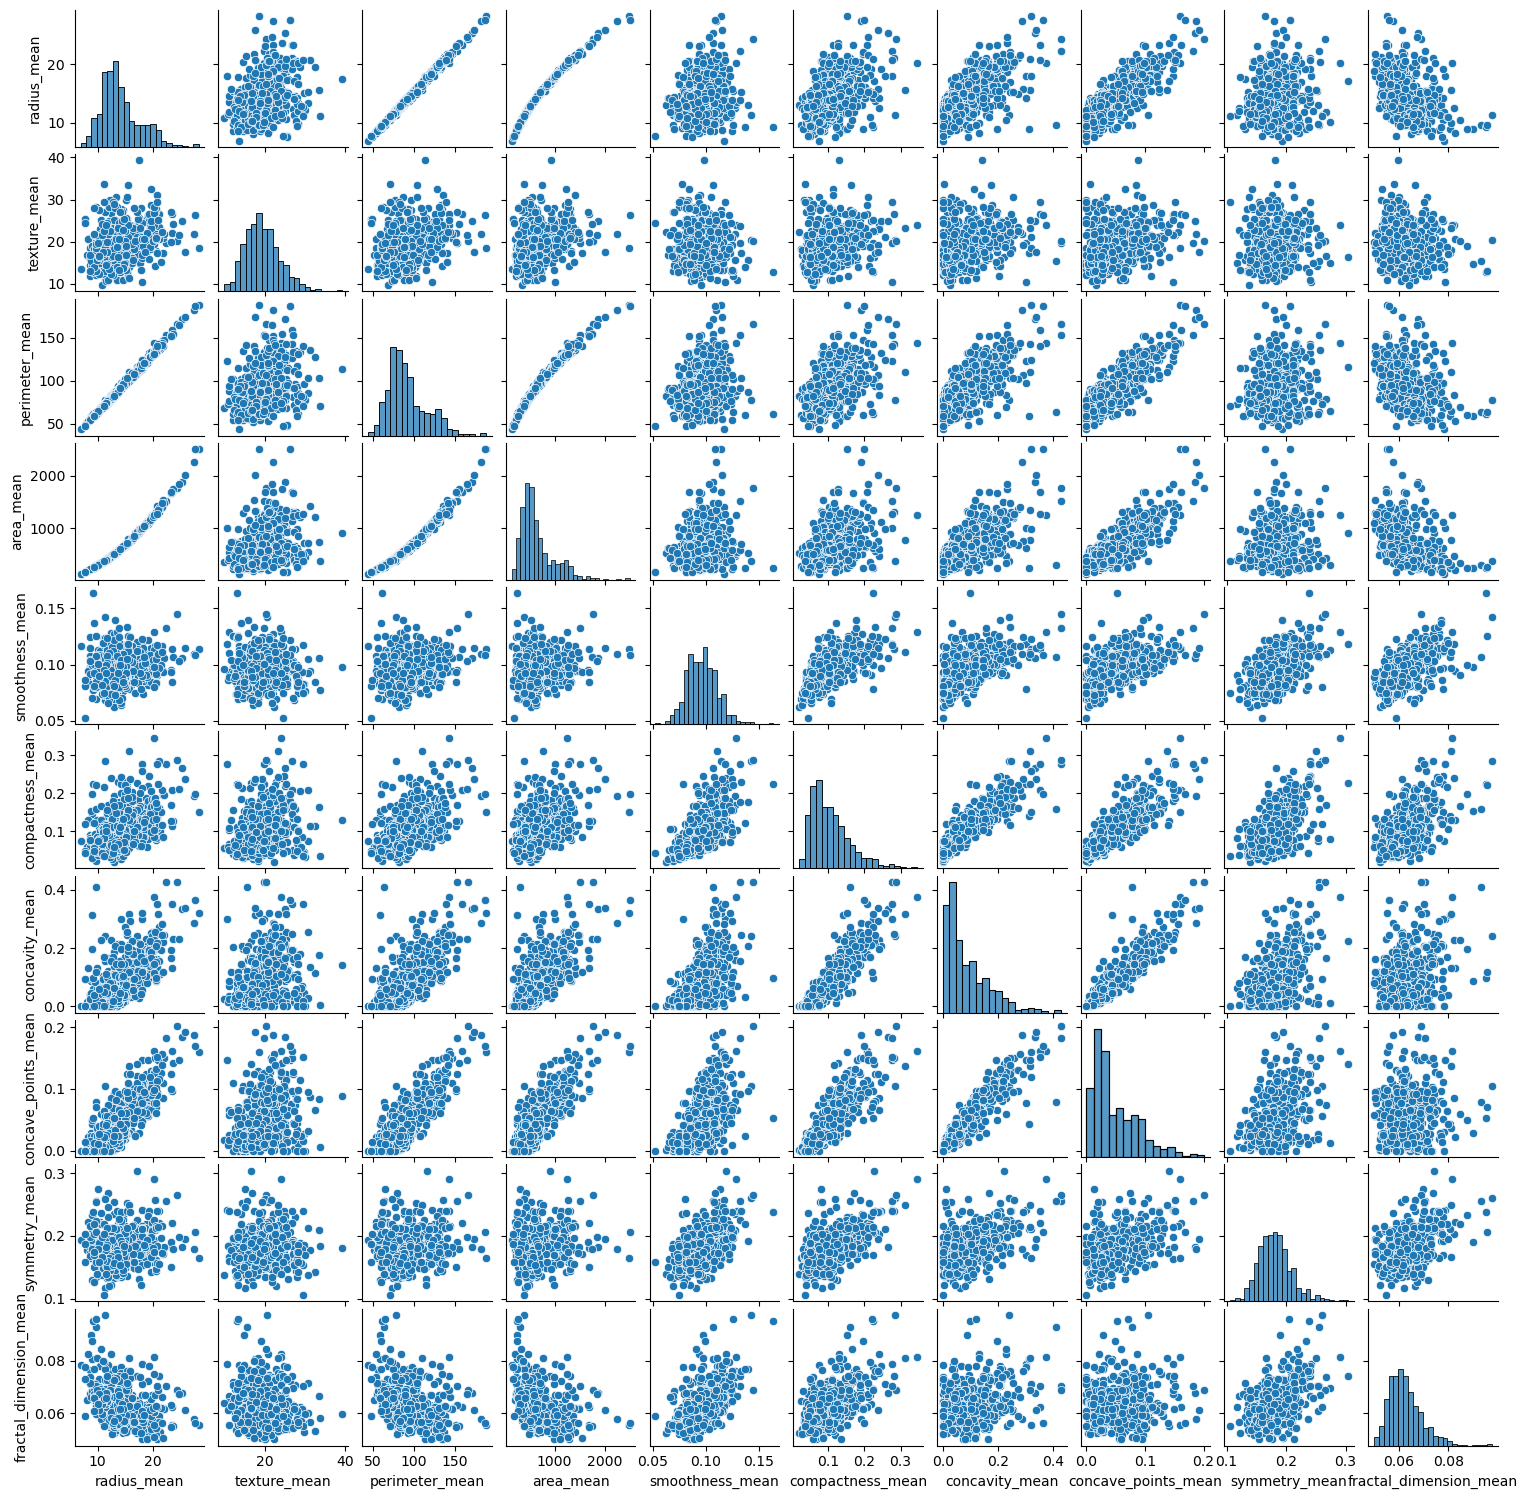

In [15]:
# create pairwise scatter plots
sns.pairplot(df_3.iloc[:, 2:12], kind='scatter', markers=["o", "s"])
plt.gcf().set_size_inches(15, 15)
plt.show()

#### Dimensionality Reduction

In [16]:
# Standardize data
scaler_3 = StandardScaler()
df_temp_3 = pd.DataFrame(scaler_3.fit_transform(df_3.iloc[:, 2:]), columns=df_3.iloc[:, 2:].columns)
df_std_3 = pd.concat([df_3.iloc[:, 0:2], df_temp_3], axis = 1)
df_std_3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
# PCA
n_components_3 = 2
pca_3 = PCA(n_components = n_components_3)
pca_fit_3 = pca_3.fit_transform(df_std_3.iloc[:, 2:])
df_pca_3 = pd.DataFrame(data = pca_fit_3, columns = ['PC '+ str(i+1) for i in range(n_components_3)])
df_pca_3 = pd.concat([df_3.iloc[:, 0:2], df_pca_3], axis = 1)

In [18]:
# Kernel-PCA
kernels_3 = {'linear': 0, 'poly': 0, 'rbf': 0, 'cosine': 0}

for kernel in kernels_3:
    kpca_3 = KernelPCA(kernel=kernel, fit_inverse_transform=True, n_components=n_components_3)
    kpca_fit_3 = kpca_3.fit_transform(df_std_3.iloc[:, 2:])
    kernels_3[kernel] = sum(kpca_3.eigenvalues_)
max_value_3 = max(kernels_3.values())
max_key_3 = [k for k, v in kernels_3.items() if v == max_value_3]
print(f"Kernel with most variance explained in first {n_components_3} components: {max_key_3[0]}")
kpca_3 = KernelPCA(kernel=max_key_3[0], fit_inverse_transform=True, n_components=n_components_3)
kpca_fit_3 = kpca_3.fit_transform(df_std_3.iloc[:, 2:])
df_kpca_3 = pd.DataFrame(data = kpca_fit_3 , columns = ['KPC '+ str(i+1) for i in range(n_components_3)])
df_kpca_3 = pd.concat([df_3.iloc[:, 0:2], df_kpca_3], axis = 1)

Kernel with most variance explained in first 2 components: linear


In [19]:
# t-SNE
tsne_3 = TSNE(n_components=n_components_3, perplexity=40, random_state=random_state_notebook)
tsne_fit_3 = tsne_3.fit_transform(np.array(df_std_3.iloc[:, 2:12]))
df_tsne_3 = pd.DataFrame(data = tsne_fit_3 , columns = ['tSNE '+ str(i+1) for i in range(n_components_3)])
df_tsne_3 = pd.concat([df_3.iloc[:, 0:2], df_tsne_3], axis = 1)

C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
# UMap
umap_3 = UMAP(n_components=n_components_3, init='random', random_state=random_state_notebook)
umap_fit_3 = umap_3.fit_transform(df_std_3.iloc[:, 2:])
df_umap_3 = pd.DataFrame(data = umap_fit_3 , columns = ['UMap '+ str(i+1) for i in range(n_components_3)])
df_umap_3 = pd.concat([df_3.iloc[:, 0:2], df_umap_3], axis = 1)

#### Compare DR algorithms

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


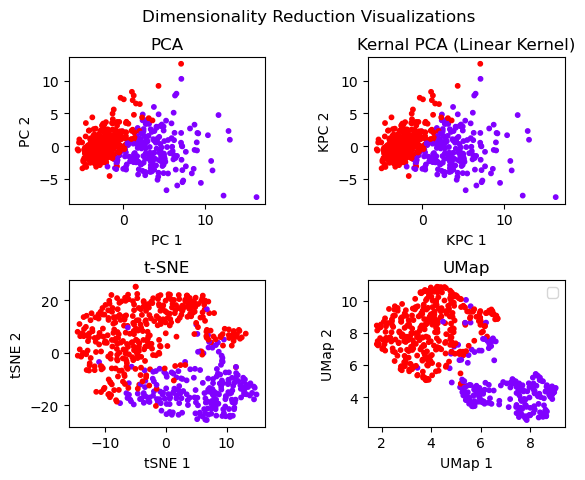

In [21]:
# Create encoded column
df_pca_3['diagnosis_num'] = df_pca_3['diagnosis'].map({'M': 0, 'B': 1})
df_kpca_3['diagnosis_num'] = df_kpca_3['diagnosis'].map({'M': 0, 'B': 1})
df_tsne_3['diagnosis_num'] = df_tsne_3['diagnosis'].map({'M': 0, 'B': 1})
df_umap_3['diagnosis_num'] = df_umap_3['diagnosis'].map({'M': 0, 'B': 1})

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(wspace=0.52, hspace=0.52)

# Plot the data from the first dataframe in the first subplot
axs[0, 0].scatter(df_pca_3['PC 1'], df_pca_3['PC 2'], 
                  c=df_pca_3['diagnosis_num'], cmap='rainbow', s=10)
axs[0, 0].set_title('PCA')
axs[0, 0].set_xlabel('PC 1')
axs[0, 0].set_ylabel('PC 2')

# Plot the data from the second dataframe in the second subplot
axs[0, 1].scatter(df_kpca_3['KPC 1'], df_kpca_3['KPC 2'], 
                  c=df_kpca_3['diagnosis_num'], cmap='rainbow', s=10)
axs[0, 1].set_title('Kernal PCA (Linear Kernel)')
axs[0, 1].set_xlabel('KPC 1')
axs[0, 1].set_ylabel('KPC 2')

# Plot the data from the third dataframe in the third subplot
axs[1, 0].scatter(df_tsne_3['tSNE 1'], df_tsne_3['tSNE 2'], 
                  c=df_tsne_3['diagnosis_num'], cmap='rainbow', s=10)
axs[1, 0].set_title('t-SNE')
axs[1, 0].set_xlabel('tSNE 1')
axs[1, 0].set_ylabel('tSNE 2')

# Plot the data from the fourth dataframe in the fourth subplot
axs[1, 1].scatter(df_umap_3['UMap 1'], df_umap_3['UMap 2'], 
                  c=df_umap_3['diagnosis_num'], cmap='rainbow', s=10)
axs[1, 1].set_title('UMap')
axs[1, 1].set_xlabel('UMap 1')
axs[1, 1].set_ylabel('UMap 2')
axs[1, 1].legend()

# Add a main title
plt.suptitle('Dimensionality Reduction Visualizations')

# Show the plot
plt.show()

We can see above each algorithm does a good job at seperating the data. UMap seperates the data very cleanly. There are only a few points near the other side. t-SNE does a pretty good job at seperating the two classes as well however, it seems to be less defined than UMap. The same holds true for PCA and kPCA, they do well at seperating the two classes but when comparing to UMap, they do not seperate it as cleanly.

# Question 4

Image file in submission. Called "hw01_q4.pdf"

In [22]:
IFrame("hw01_q4.pdf", width=800, height=2100)

# Question 5

#### a.

In [23]:
# Vectors
P = [0.10, 0.40, 0.25, 0.25]
Q = [0.60, 0.15, 0.05, 0.20]

# Entropy
entropy_p = -1 * sum([i * np.log2(i) for i in P])
entropy_q = -1 * sum([i * np.log2(i) for i in Q])

# Cross Entropy
cross_entropy_p = -1 * sum([P[i] * np.log2(Q[i]) for i in range(0, len(P))])
cross_entropy_q = -1 * sum([Q[i] * np.log2(P[i]) for i in range(0, len(Q))])

# KL Divergence
kl_divergence_p = sum(kl_div(P, Q))
kl_divergence_q = sum(kl_div(Q, P))

print("---------------------")
print(f"Entropy:")
print(f"P: {entropy_p}")
print(f"Q: {entropy_q}")
print("---------------------")
print(f"Cross Entropy:")
print(f"P: {cross_entropy_p}")
print(f"Q: {cross_entropy_q}")
print("---------------------")
print(f"KL Divergence:")
print(f"P: {kl_divergence_p}")
print(f"Q: {kl_divergence_q}")
print("---------------------")

---------------------
Entropy:
P: 1.860964047443681
Q: 1.5332062193464953
---------------------
Cross Entropy:
P: 2.8294468445267844
Q: 2.6914460711655215
---------------------
KL Divergence:
P: 0.6713011202189625
Q: 0.8028306877005269
---------------------


#### b.

In [24]:
# Create array and data
dx = 0.0001
x = np.arange(-15, 15, dx)
P_b = norm.pdf(x, 0, 2)
Q_b = norm.pdf(x, 2, 2)
Q_b_not = norm.pdf(x, 5, 3)

# 𝐾𝐿 (𝑃 || 𝑄)
kl_P_Q = sum(kl_div(P_b, Q_b)) * dx

# 𝐾𝐿 (𝑄 || 𝑃)
kl_Q_P = sum(kl_div(Q_b, P_b)) * dx

# 𝐾𝐿 (𝑃 || 𝑄’)
kl_P_Qnot = sum(kl_div(P_b, Q_b_not)) * dx

# 𝐾𝐿 (𝑄’ || 𝑃)
kl_Qnot_P = sum(kl_div(Q_b_not, P_b)) * dx

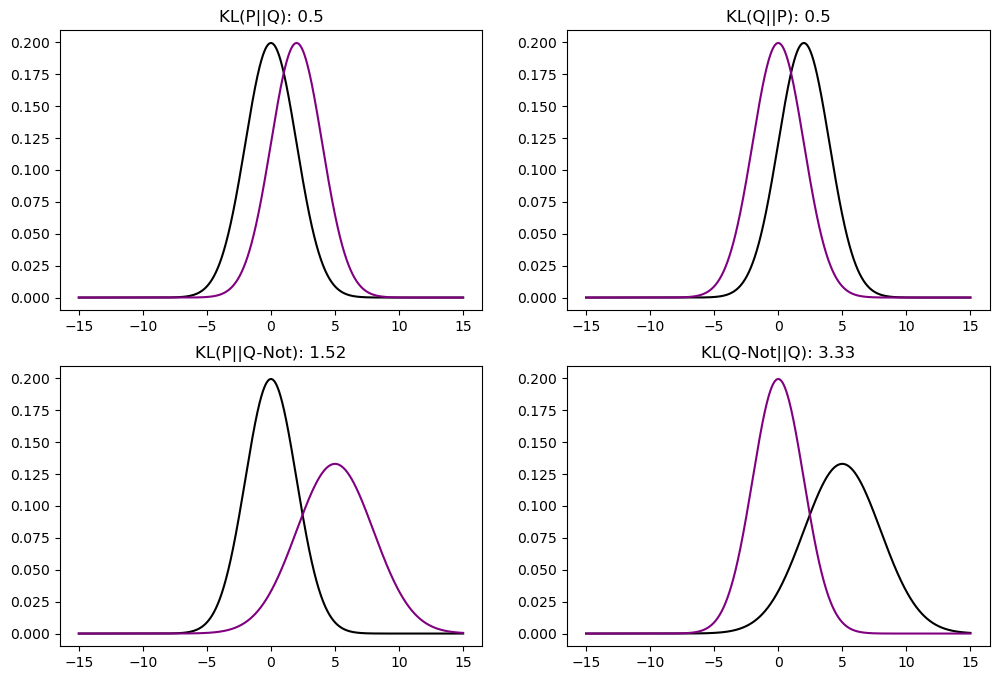

In [25]:
# Create 2x2 subplots with size 12x8
fig, ax = plt.subplots(2, 2, figsize = (12, 8))

# First subplot, KL(P||Q) with title and P,Q plotted with different color
ax[0][0].set_title(f"KL(P||Q): {round(kl_P_Q, 2)}")
ax[0][0].plot(x, P_b, color = "black")
ax[0][0].plot(x, Q_b, color = "purple")

# Second subplot, KL(Q||P) with title and Q,P plotted with different color
ax[0][1].set_title(f"KL(Q||P): {round(kl_Q_P, 2)}")
ax[0][1].plot(x, Q_b, color = "black")
ax[0][1].plot(x, P_b, color = "purple")

# Third subplot, KL(P||Q-Not) with title and P,Q-Not plotted with different color
ax[1][0].set_title(f"KL(P||Q-Not): {round(kl_P_Qnot, 2)}")
ax[1][0].plot(x, P_b, color = "black")
ax[1][0].plot(x, Q_b_not, color = "purple")

# Fourth subplot, KL(Q-Not||Q) with title and Q-Not,Q plotted with different color
ax[1][1].set_title(f"KL(Q-Not||Q): {round(kl_Qnot_P, 2)}")
ax[1][1].plot(x, Q_b_not, color = "black")
ax[1][1].plot(x, P_b, color = "purple")

plt.show()